# Radiation Laws #


## Planck's Black Body Function ##


$$ b_\lambda(T, \lambda) = \frac{c_1}{\lambda^5\left( \exp\left(\frac{c_2}{\lambda T}\right)-1 \right)}$$

$$ 𝑐_1=2\pi h c^2 = 3.741\cdot 10 ^{−16} \mathrm{Wm^2} $$

$$ 𝑐_2=\frac{hc}{k} = 1.438\cdot 10^{−2} \mathrm{mK} $$

## Stefan-Boltzmann Law ##

$$e_T(T) = \int_0^{+\infty} b_\lambda(\lambda,T) d\lambda = \sigma T^4$$

## Wien's Displacement Law ##

$$ \lambda_\mathrm{max} = \frac{2898\;\mathrm{\mu m\cdot K}}{T} $$

# Physical Constants related to Radiation

In [1]:
# Import constants and rename them

#import scipy.constants as sc
#k = sc.k
#h = sc.h
#c = sc.c
#sigma = sc.sigma
#pi = sc.pi

# Simpler: 
from scipy.constants import pi, c, h, k, sigma

print("PYSICAL CONSTANTS")
print("----------------------")
print("Pi:                   pi = %g " % pi)
print("Vac. speed of light:   c = %g m/s" % c)
print("Plank's constant:      h = %g Js" % h)
print("Boltzmann:             k = %g J/K" % k)
print("Stefan-Boltzmann:  sigma = %g W/(m^2 K^4)" % sigma)

PYSICAL CONSTANTS
----------------------
Pi:                   pi = 3.14159 
Vac. speed of light:   c = 2.99792e+08 m/s
Plank's constant:      h = 6.62607e-34 Js
Boltzmann:             k = 1.38065e-23 J/K
Stefan-Boltzmann:  sigma = 5.67037e-08 W/(m^2 K^4)


# Planck's Law of Black Body Radiation #

In [2]:
# This function causes problems for small lambda.
def planck(T,lam):
    from scipy.constants import k,h,c,pi
    from numpy import exp
    #s = sigma
    # here we could also import all the constants from scipy.constants
    #k = 1.38054e-23 # J/K
    #h = 6.6256e-34 # Js
    #s = 5.6703e-8 # W/(m^2 K^4)
    #c = 2.997e8 # m/s
    c1= 2*pi*c**2*h
    c2= c*h/k
    el = c1/(lam**5*(exp(c2/(lam*T))-1))
    return(el)

### Imports and Default Plot Settings

In [3]:
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import sigma

In [4]:
plt.rcParams['figure.figsize'] = (4,3) # Set the default figure size. You have to calibrate DPI
plt.rcParams['figure.dpi'] = 136 # depends on your system
#mpl.rcParams['figure.figsize'] = (6,4) # Set the default figure size. You have to calibrate DPI
#mpl.rcParams['figure.dpi'] = 300 # depends on your system
plt.show()

### Definition of the wavelength range for evaluating the Planck curve

$1\; \mathrm{nm} \le \lambda \lt 10000\; \mathrm{nm}$

In [5]:
lam=np.arange(1,10000)*1e-9 # lam = 0 nm causes problems in the function planck()

In [6]:
lam

array([1.000e-09, 2.000e-09, 3.000e-09, ..., 9.997e-06, 9.998e-06,
       9.999e-06])

In [7]:
#T1 = 6000
#e1=planck(T1,lam)

T2 = 3000
e2=planck(T2,lam)

#T3 = 300
#e3=planck(T3,lam)


<ipython-input-2-c4921daf6450>:13: RuntimeWarning: overflow encountered in exp
  el = c1/(lam**5*(exp(c2/(lam*T))-1))


## Plotting the Planck Curve ##

<ipython-input-2-c4921daf6450>:13: RuntimeWarning: overflow encountered in exp
  el = c1/(lam**5*(exp(c2/(lam*T))-1))


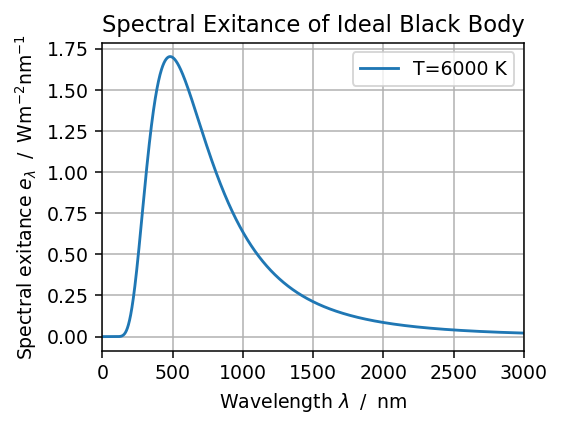

In [8]:
#fig1 = plt.figure(1)
#ax1 = fig1.add_subplot(111)

T = 6000 # K
#T = 5525 # K
e_lam = planck(T,lam)

fig1, ax1 = plt.subplots(1,1)

ax1.plot(lam*1e9,e_lam*1e-9/100000*1.7)
ax1.set_xlim(np.array([0,3000])) # nm
plt.grid(True)

ax1.set_title(r'Spectral Exitance of Ideal Black Body')
ax1.set_xlabel(r'Wavelength $\lambda \;\;/\;\; \mathrm{nm}$')
ax1.set_ylabel(r'Spectral exitance $e_{\lambda} \;\;/\;\; \mathrm{W m^{-2} nm^{-1}}$')

ax1.legend([f"T={T} K"])
plt.show()


In [9]:
# Five curves for five temperatures
T1 = 6000
e1=planck(T1,lam)
T2 = 3000
#T2 = 5525
e2=planck(T2,lam)
T3 = 1500
e3=planck(T3,lam)
T4 = 750
e4=planck(T4,lam)
T5 = 375
e5=planck(T5,lam)

<ipython-input-2-c4921daf6450>:13: RuntimeWarning: overflow encountered in exp
  el = c1/(lam**5*(exp(c2/(lam*T))-1))


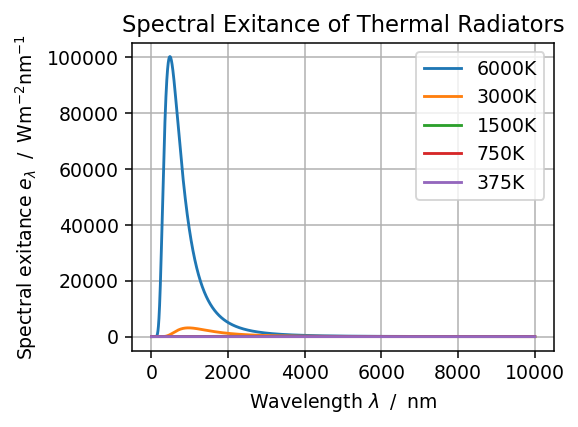

In [10]:
#fig=plt.figure(figsize=(10, 8), dpi = 80, facecolor='w', edgecolor='k')

#fig2 = plt.figure(2)
#ax2 = fig2.add_subplot(111)

fig2, ax2 = plt.subplots(1,1)

ax2.plot(lam*1e9,e1*1e-9)
ax2.plot(lam*1e9,e2*1e-9)
ax2.plot(lam*1e9,e3*1e-9)
ax2.plot(lam*1e9,e4*1e-9)
ax2.plot(lam*1e9,e5*1e-9)

ax2.grid(True)

ax2.set_title(r'Spectral Exitance of Thermal Radiators')
ax2.set_xlabel(r'Wavelength $\lambda \;\;/\;\; \mathrm{nm}$')
ax2.set_ylabel(r'Spectral exitance $e_{\lambda} \;\;/\;\; \mathrm{W m^{-2} nm^{-1}}$')

ax2.legend(['6000K','3000K','1500K','750K','375K'])

plt.show()

#plt.savefig('planck_IPython_V001.png', bbox_inches='tight')
#plt.show()
#plt.savefig('planck_IPython_V001.png')

In [11]:
def wien(T):
    lam_max = 2898e-6/T
    return(lam_max)

In [28]:
T_wien = np.array([6000,3000,1500,750,375, 306])
lam_wien = wien(T_s)

for (T_wien_elt, lam_wien_elt) in zip(T_wien,lam_wien):
    print(f"{T_wien_elt:6.1f} K -> {lam_wien_elt*1e9:7.1f} nm")

6000.0 K ->   483.0 nm
3000.0 K ->   966.0 nm
1500.0 K ->  1932.0 nm
 750.0 K ->  3864.0 nm
 375.0 K ->  7728.0 nm
 306.0 K ->  9470.6 nm


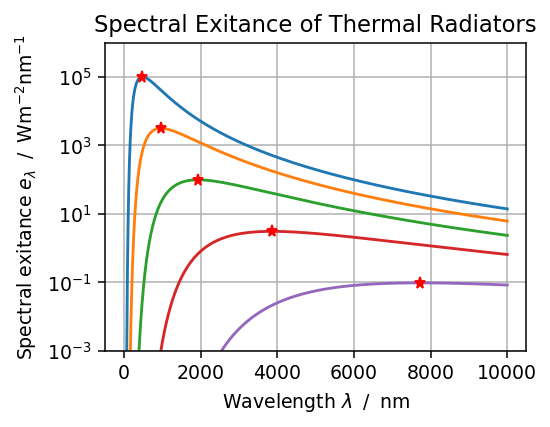

In [29]:
#fig3 = plt.figure()
#ax3 = fig3.add_subplot(111)

fig3, ax3 = plt.subplots(1,1)

ax3.semilogy(lam*1e9,e1*1e-9)
lam_max_T1 = wien(T1)
ax3.plot(lam_max_T1*1e9, planck(T1,lam_max_T1)*1e-9, "r*")

ax3.semilogy(lam*1e9,e2*1e-9)
lam_max_T2 = wien(T2)
ax3.plot(lam_max_T2*1e9, planck(T2,lam_max_T2)*1e-9, "r*")

ax3.semilogy(lam*1e9,e3*1e-9)
lam_max_T3 = wien(T3)
ax3.plot(lam_max_T3*1e9, planck(T3,lam_max_T3)*1e-9, "r*")

ax3.semilogy(lam*1e9,e4*1e-9)
lam_max_T4 = wien(T4)
ax3.plot(lam_max_T4*1e9, planck(T4,lam_max_T4)*1e-9, "r*")

ax3.semilogy(lam*1e9,e5*1e-9)
lam_max_T5 = wien(T5)
ax3.plot(lam_max_T5*1e9, planck(T5,lam_max_T5)*1e-9, "r*")

ax3.grid(True)

ax3.set_ylim([1e-3,1e6])

ax3.set_title(r'Spectral Exitance of Thermal Radiators')
ax3.set_xlabel(r'Wavelength $\lambda \;\;/\;\; \mathrm{nm}$')
ax3.set_ylabel(r'Spectral exitance $e_{\lambda} \;\;/\;\; \mathrm{W m^{-2} nm^{-1}}$')

#ax3.legend(['6000K','max(6000K)','3000K','1500K','750K','375K'])
plt.show()

# Integration of Planck's Function of Black Body Radiation 

$e_\lambda(T,\lambda)$ is integrable (i.e. the integral converges) on the interval $[0,\infty]$ but we cannot write down an antiderivative in closed form. 

$$ \lim_{\lambda_1 -> \infty} \int_0^{\lambda_1} e_\lambda(T, \lambda) d\lambda = \sigma T^4$$

## Trapezoid Rule ##

Integration (in 1D) can be interpreted as the determination of the area under a curve ("well-behaving" graph of a function). If segments of the curve are below zero then their area contribution is counted negative.

To determine the integral numerically the area between the function graph and the x-axis is approximated by a finite number of primitive geometric figures such as rectangles or trapezoids. The sum of all the geometric figures' areas yields the approximated area. 

The more geometric figures are used the finer the discretization of the area becomes and the accuracy of the areal approximation increases. This area approaches the "real" integral more and more. The accuracy limit is determined by the number representation of the computer used. 

The Trapezoid rule is a numerical interpolation method utilizing trapezoids to approximate the area. The area of a single trapezoid can be calculated easily. 

The areas of $n$ trapezoids $A_1, \, \ldots \, A_n$ are:


$$
\begin{eqnarray}
A_1 &=& (x_1 - x_0) \frac{1}{2} (y_1 + y_0) \\
A_2 &=& (x_2 - x_1) \frac{1}{2} (y_2 + y_1) \\
& \vdots & \\
A_{n} &=& (x_n - x_{n-1}) \frac{1}{2} (y_n + y_{n-1}) \\
\end{eqnarray}
$$

With $y_k = f(y_k)$ . 

The $n$ trapezoids are determined by their $n+1$ sides at the supporting points $x_0, x_1, \ldots x_n$.

To simplify the problem the trapezoids are chosen such that they have the same width. Thus the $n+1$ supporting points (the $x_k$) are equidistant: i.e. $x_k - x_{k-1} = h\;,\; k\in \{0, \ldots n\}$.

The total area $A$ of all trapezoids is: 
$$ A = \sum_{k=1}^{n} A_k = \sum_{k=1}^{n} \frac{1}{2}h\,(y_{k-1}+y_k) = \frac{1}{2}h\sum_{k=1}^{n} (y_{k-1}+y_k) $$

The last sum reads:

$$
\begin{eqnarray}
\sum_{k=1}^{n} (y_{k-1} +y_{k}) &=& \\  
& = & (y_0 + y_1) + (y_1 + y_2) + \ldots + (y_{n-2} + y_{n-1}) + (y_{n-1} + y_n) = \\
& = & y_0 + y_n + 2\sum_{k=1}^{n-1}y_k = \\ 
& = & 2y_0 + 2y_n - y_0 -y_n + 2\sum_{k=1}^{n-1}y_k = \\ 
&= & 2\sum_{k=0}^{n}y_k - (y_0 + y_n) 
\end{eqnarray}
$$

Finally the trapezoid rule reads:
$$ 
\begin{eqnarray}
A & = & \frac{1}{2}h\,\left( 2\sum_{k=0}^{n}y_k - (y_0 + y_n) \right) = h\left(\sum_{k=0}^{n}y_k -\frac{1}{2}(y_0 + y_n)\right) \\
y_k & = & f(y_k) \\ 
\Rightarrow \; A & = & h\left(\sum_{k=0}^{n}f(x_k) -\frac{1}{2}\left(f(x_0) + f(x_n)\right)\right)
\end{eqnarray}
$$

In [30]:
# Trapezoid rule

def integrate(f, a, b, n=100):
    """
    Integrate f from a to b,
    using the Trapezoidal rule with n intervals.
    """
    x = np.linspace(a, b, n+1)    # Coordinates of the intervals
    h = x[1] - x[0]            # Interval spacing
    I = h*(np.sum(f(x)) - 0.5*(f(a) + f(b)))
    return I

In [31]:
def plot_trapz(f, xs, ax, sc_x=1e9, sc_y=1e-9, color="y"):
    """
    Plot trapezoids based on function f evaluated at supporting points xs.
    ax is an axis element of a matplotlib.pyplot subplot, i.e. of type matplotlib.axes
    sc_x and sc_y are scaling factors for plotting used for unit conversion (e.g. m -> nm)
    color is the trapezoid plot color.
    """    
    
    xp = xs*sc_x
    yp = f(xs)*sc_y

    xi = [xp,xp]   # multiple line plot
    yi = [yp*0,yp] # multiple line plot
    
    ax4.plot(xp,yp*0,color+".-")
    ax4.plot(xp,yp,color+".-")
    ax4.plot(xi,yi,color+"-")

    

In [32]:
help(plot_trapz)

Help on function plot_trapz in module __main__:

plot_trapz(f, xs, ax, sc_x=1000000000.0, sc_y=1e-09, color='y')
    Plot trapezoids based on function f evaluated at supporting points xs.
    ax is an axis element of a matplotlib.pyplot subplot, i.e. of type matplotlib.axes
    sc_x and sc_y are scaling factors for plotting used for unit conversion (e.g. m -> nm)
    color is the trapezoid plot color.



### Define temperature and integrate manually

In [33]:
T = 6000

<ipython-input-2-c4921daf6450>:13: RuntimeWarning: overflow encountered in exp
  el = c1/(lam**5*(exp(c2/(lam*T))-1))


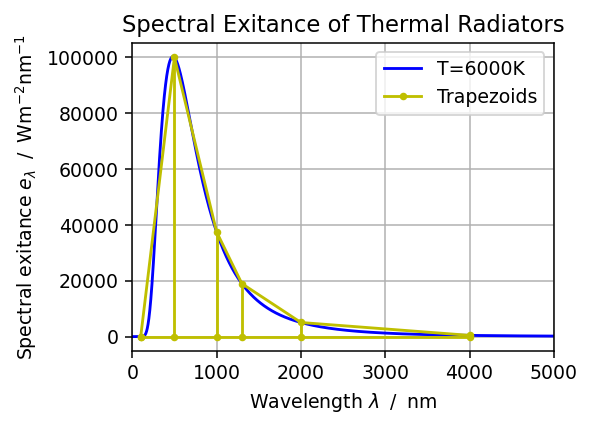

In [34]:
fig4, ax4 = plt.subplots()

sc_x = 1e9  # scale factor x-axis, m -> nm (1e9 nm are in 1 m)
sc_y = 1e-9 # scale factor y-axis, W/(m²m) -> W/(m²nm)

ax4.plot(lam*sc_x,planck(T,lam)*sc_y,"b")

# supporting points, sampling points
lam_sample = np.array([100,500,1000,1300,2000,4000])*1e-9 # 100nm, 500nm, 1000nm ... in m

# Transform planck(T, lam) into a function pl(lam) for a fixed temperature  
# pl(lam) = planck(T=6000,lam): reduce the 2-argument function planck to a 1-argument function pl with a fixed temp

pl = lambda x: planck(T,x) # take the T which is already defined
plot_trapz(pl, lam_sample, ax4, color="y")

ax4.set_xlim(np.array([0,5000]))
ax4.grid(True)

ax4.set_title(r'Spectral Exitance of Thermal Radiators')
ax4.set_xlabel(r'Wavelength $\lambda \;\;/\;\; \mathrm{nm}$')
ax4.set_ylabel(r'Spectral exitance $e_{\lambda} \;\;/\;\; \mathrm{W m^{-2} nm^{-1}}$')

ax4.legend([f"T={T}K","Trapezoids"])
plt.show()

$$ 
\begin{eqnarray}
e_T & = & \sigma T^4 = \\
& = & 5.67\cdot10^{-8} \mathrm{\frac{W}{m^2 K^4}} \cdot (6000\;\mathrm{K})^4 = \\
& = & 5.67\cdot10^{-8} \mathrm{\frac{W}{m^2 K^4}} \cdot 6000^4 \; \mathrm{K}^4 = \\
& = & 73.5\;\mathrm{MW}
\end{eqnarray}
$$

In [62]:
sigma = 5.67e-8 # W / (m^2 K^4)
T = 6000 # K
# T = 5525
# T = 33 + 273 # 33°C in K
eT = sigma*T**4 # W / m^2
print(f"The total exitance of a black body\nof temperature {T} K\nis {eT*1e-6:.1f} MW/m^2")
print("Typical power of power plant block is 100MW ... 750MW ... 1000MW")

The total exitance of a black body
of temperature 6000 K
is 73.5 MW/m^2
Typical power of power plant block is 100MW ... 750MW ... 1000MW


In [63]:
lam_s = np.array([100, 500, 1000, 1300, 2000, 4000])*1e-9 # in m
lam_s*1e9

array([ 100.,  500., 1000., 1300., 2000., 4000.])

In [64]:
e_lam_s = planck(T,lam_s) # W/(m^2 m) -> W/(m^2 nm)
e_lam_s*1e-9

for (lam, el) in zip(lam_s, e_lam_s):
    print(f"{lam*1e9:7.1f} nm -> {el*1e-9:7.1f} W/(m^2 nm)")

  100.0 nm ->     1.4 W/(m^2 nm)
  500.0 nm -> 99767.3 W/(m^2 nm)
 1000.0 nm -> 37415.0 W/(m^2 nm)
 1300.0 nm -> 18923.5 W/(m^2 nm)
 2000.0 nm ->  5047.2 W/(m^2 nm)
 4000.0 nm ->   445.0 W/(m^2 nm)


In [65]:
A1 = ( 500 -  100) * 1/2 *     (1.4 + 99767.3) # W/m^2
A2 = (1000 -  500) * 1/2 * (99767.3 + 37415.0)
A3 = (1300 - 1000) * 1/2 * (37415.0 + 18932.5)
A4 = (2000 - 1300) * 1/2 * (18932.5 +  5047.2)
A5 = (4000 - 2000) * 1/2 *  (5047.2 +   445.0)
print(f"A1: {A1/1e6:6.2f} MW/m^2")
print(f"A2: {A2/1e6:6.2f} MW/m^2")
print(f"A3: {A3/1e6:6.2f} MW/m^2")
print(f"A4: {A4/1e6:6.2f} MW/m^2")
print(f"A5: {A5/1e6:6.2f} MW/m^2")

A = A1 + A2 + A3 +A4 + A5
print(f"A:  {A/1e6:6.2f} MW/m^2")

eT = sigma*T**4
print(f"eT: {eT/1e6:6.2f} MW/m^2")

d = (A - eT); r = d / eT
print(f"rel. error: {r*100:5.2f} %")

abs_error = A-eT # is it big or small? It depends!
rel_error = abs_error/eT # deviation in relation to the real value

print("The absolute error is %8.3g W/m²" % abs_error)
print("The relative error is %8.3f" % rel_error)
print("The relative error is %+7.2f %%" % (rel_error*100))


A1:  19.95 MW/m^2
A2:  34.30 MW/m^2
A3:   8.45 MW/m^2
A4:   8.39 MW/m^2
A5:   5.49 MW/m^2
A:   76.59 MW/m^2
eT:  73.48 MW/m^2
rel. error:  4.22 %
The absolute error is  3.1e+06 W/m²
The relative error is    0.042
The relative error is   +4.22 %


## Manual integration by trapezoids

In [66]:
mylist = zip(lam_s*1e9, e_lam_s*1e-9)
for lam, e_lam in mylist:
#    print("%8.1f   %8.1f" % (lam, e_lam))
    print(f"| {lam:8.1f} nm | {e_lam:8.1f} W/(m²nm) |")

|    100.0 nm |      1.4 W/(m²nm) |
|    500.0 nm |  99767.3 W/(m²nm) |
|   1000.0 nm |  37415.0 W/(m²nm) |
|   1300.0 nm |  18923.5 W/(m²nm) |
|   2000.0 nm |   5047.2 W/(m²nm) |
|   4000.0 nm |    445.0 W/(m²nm) |


### What the students calculated in the 2020 Physics 2 class ###

In [68]:
# Results form the Students' trapezoid area calculations:
A1 = 19.97e6 # W/m
A2 = 34.3e6
A3 = 8.4e6
A4 = 8.4e6
A5 = 5.5e6
A = A1 + A2 +A3 + A4 + A5

T = 6000 # K
sigma = 5.67e-8 # W/(m^2 K^4)

eT = sigma * T**4

print ("Approximation (sum of trapezoids):  A = %.3g W/m²" % A)
print ("Stefan-Boltzmann:                  eT = %.3g W/m²" % eT)

Approximation (sum of trapezoids):  A = 7.66e+07 W/m²
Stefan-Boltzmann:                  eT = 7.35e+07 W/m²


## Another Trapezoid Rule for Listed Values

In [72]:
def integrate_listed_val(x,y):
    
    xL = x[:-1]
    yL = y[:-1]
    
    xR = x[1:]
    yR = y[1:]
    
    Dx = xR - xL
    
    My = 1/2*(yR + yL)
    
    Ak = Dx*My
    
    A = np.sum(Ak)
    
    return A